# Homework Assignment 5 - Deep Learning 2: Convolutional and Recurrent Neural Networks
### **Due:** Tuesday, June 6, 11:59pm
### Total: 100 points

## Import all the libraries and tools you need below.

In [205]:
import os

os.getcwd()
os.chdir("C:\Data")
os.getcwd()

import tensorflow as tf
tf.config.run_functions_eagerly(True)

import pandas as pd
import numpy as np 
from numpy import log,dot,e,shape
from numpy import log,dot,e,shape
from numpy.linalg import norm
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical
from keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras import regularizers
from tensorflow.keras.layers import LSTM, MaxPooling1D, Conv1D, Conv2D
from tensorflow.keras.layers import Bidirectional, MaxPooling2D 
from tensorflow.keras.layers import Flatten, Dense, Dropout, GRU

## **1)** CNN for Image Classification (35 points)

**Before you start:** This dataset and its classification is a popular problem on Kaggle, so you can use a lot of help from there on both the network architecture and the image generators. This is fine, since the main goal of this question is to familiarize you to use big data. **There is only one restriction: You are not permitted to use any built-in network models (VGG16, ResNet etc.) or transfer learning. You have to build your own architecture from scratch and train it.** Anything else is permitted.

In this question, you will need a Convolutional Neural Network (CNN) to classify patients that are healthy (0) and patients with pneumonia (1) using their chest x-ray images. 

First of all, the image dataset for this question too big to read in your Python memory, so **you should not try to directly read it.** What you need is data generator objects that will read the data in batches without trying to hold all the images in memory.

Download and put the [chest_xray](https://nuwildcat-my.sharepoint.com/:f:/r/personal/ebf987_ads_northwestern_edu/Documents/chest_xray?csf=1&web=1&e=t3293g) folder somewhere on your machine (or Drive folder for Colab) and put this .ipynb file in the same location. The cell below creates the paths that the image generators will use to pull the images and also some values to process the images.

In [7]:
train_path = 'chest_xray/train'
test_path = 'chest_xray/test'
val_path = 'chest_xray/val'

batch_size = 16

img_height = 500
img_weight = 500

**a)** Using the **ImageDataGenerator** class from **keras.preprocessing.image**, create two generator objects. The first one should be for training and it should include data augmentation to train the network better. Data augmentation means increasing the training data size with certain image processing tools. Very common data augmentation tools are zooming and shearing different parts of a training image and using these parts as different training images. The first generator inputs:

- rescale ratio should be set to 1/255
- shear range should be 0.2
- zoom range should be 0.2

**(4 points)**

**b)** Create the second generator object with only the rescale ratio input. This one will be for the validation and test datasets and it does not need any augmentation tools.

**(3 points)**

In [8]:
#A
train_datagen = ImageDataGenerator(
    rescale=1/255,
    shear_range=0.2,
    zoom_range=0.2
)

#B
test_datagen = ImageDataGenerator(
    rescale=1/255
)

**c)** Using the generator objects and their **.flow_from_directory** method, create the generators for the training, validation and test data.

- You need the training generator object for the training generator only. The validation and test generators need the test generator object.

- In all generators, you need the proper **path**, the **target size** and the **batch size**. (values given above)

- For all generators, set the **color mode** to **"grayscale"** and the **class mode** to **"binary"**, since these are the settings for the task.

- **shuffle** should be **True** only for the training data.

**(8 points)**

In [9]:
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(img_weight, img_height),
    batch_size=batch_size,
    class_mode='binary'
)

validation_generator = test_datagen.flow_from_directory(
    val_path,
    target_size=(img_weight, img_height),
    batch_size=batch_size,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(img_weight, img_height),
    batch_size=batch_size,
    class_mode='binary'
)

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


**d)** Create a CNN for the binary classification task.

Compile the network using the proper cost function and an optimizer of your choice. **(3 points)** Don't forget to set the number of epochs and other necessary inputs while training. **(4 points)** After the network is trained, print the test accuracy. **(3 points)**

The entire architecture and the training inputs are your choice. Your network should return a test accuracy higher than 88%. **(10 points)**

A few notes:

- Instead of X_train and y_train, you only need the training generator defined above, which will read both from the given directory.

- Since you do not have a y_train, you cannot one-hot-encode it. This means you cannot have an output layer with two nodes. You need to work around this by changing the output layer, its function and the cost function. (Check the slides.)

- Instead of validation split, use validation data and set it to the validation generator.

- Note that you do not have a y_test for this question; you only have the test generator. To calculate the test accuracy, follow these steps:
    - While compiling the network, use the **metrics** input and set it to **accuracy**.
    - After the training is done, use **.evaluate** instead of **.predict**, with the test generator. This will return the test loss and test accuracy as two outputs, respectively.
    
- The training will take some time. (25 minutes on my machine to pass 88%.)

In [10]:
tf.random.set_seed(0)
np.random.seed(0)

# Create the model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_weight, img_height, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer='adam', 
              metrics=['accuracy'])

In [11]:
epochs = 10

# Train the model
model.fit(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator
)

C:\Users\dylan\anaconda3\lib\site-packages\tensorflow\python\data\ops\structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Epoch 1/10
326/326 [==============================] - 2172s 7s/step - loss: 0.5018 - accuracy: 0.8390 - val_loss: 1.1501 - val_accuracy: 0.6250
Epoch 2/10
326/326 [==============================] - 1346s 4s/step - loss: 0.2344 - accuracy: 0.9086 - val_loss: 0.3488 - val_accuracy: 0.7500
Epoch 3/10
326/326 [==============================] - 1787s 5s/step - loss: 0.1988 - accuracy: 0.9237 - val_loss: 0.9579 - val_accuracy: 0.6250
Epoch 4/10
326/326 [==============================] - 1537s 5s/step - loss: 0.1930 - accuracy: 0.9262 - val_loss: 0.5421 - val_accuracy: 0.6875
Epoch 5/10
326/326 [==============================] - 1538s 5s/step - loss: 0.1756 - accuracy: 0.9333 - val_loss: 0.8329 - val_accuracy: 0.6250
Epoch 6/10
326/326 [==============================] - 2581s 8s/step - loss: 0.1758 - accuracy: 0.9321 - val_loss: 0.9723 - val_accuracy: 0.6250
Epoch 7/10
326/326 [==============================] - 1256s 4s/step - loss: 0.1602 - accuracy: 0.9427 - val_loss: 0.2760 - val_accuracy:

In [12]:
test_loss, test_accuracy = model.evaluate(test_generator)
print("Test Accuracy:", test_accuracy)

39/39 [==============================] - 31s 723ms/step - loss: 0.3891 - accuracy: 0.8958
Test Accuracy: 0.8958333134651184


## 2) CNN for Sequence Classification (30 points)

In this question, you will use a CNN to classify the cardiac arrhythmia dataset you used for the previous homework assignment. Use the same lines below that preprocess the data and create the training and test sets.

0.0    72471
4.0     6431
2.0     5788
1.0     2223
3.0      641
Name: 187, dtype: int64
0.0    8000
4.0    6431
2.0    5788
1.0    2223
3.0     641
Name: 187, dtype: int64
(20774, 187)
[[1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0.]
 ...
 [0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]]


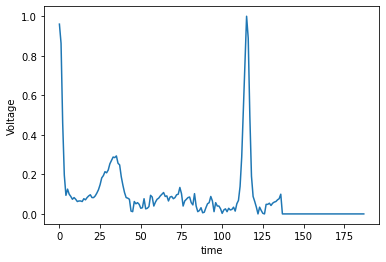

In [191]:
data = pd.read_csv('heartbeat_dataset.csv', header=None)
#data=pd.DataFrame(data)

# One heartbeat
plt.plot(data.iloc[1,:])
plt.xlabel('time')
plt.ylabel('Voltage')
plt.plot()

# Overall class distribution
print(data[187].value_counts())

# Downsampling Class 0 instances to 8000
class_other = data[data[187]!=0.0]
class_0 = data[data[187]==0.0].sample(n = 8000, random_state=1)
data_sampled = pd.concat([class_0, class_other])

# The new class distribution.
print(data_sampled[187].value_counts())

# Separating the features and the labels into X and y variables.
y = data_sampled[187]
X = data_sampled.drop([187], axis=1)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,random_state=1, test_size=0.1)

print(X_train.shape)

X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = to_categorical(y_train)

print(y_train)

**a)** Note that even though the instances are not images, they have a one-dimensional temporal structure, which can be used as additional information by a CNN.  To use this data as a "one-dimensional image" dataset, you need to add a third dimension, which is the number of channels. For this single-sequence (the medical term is single-lead) heartbeat dataset, the number of channels is 1.

Reshape both the training and the test datasets. The datasets should have their three dimensions as **(number of instances, sequence length, number of channels)**. **(5 points)**

In [192]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)

X_test = X_test.reshape(X_test.shape[0], X_train.shape[1], 1)

y_test.shape
y_test_reshaped = np.array(y_test).reshape((-1, 1))
y_test_categorical = to_categorical(y_test_reshaped, num_classes=5)
print(y_test_categorical.shape)
print(y_train.shape)

(2309, 5)
(20774, 5)


**b)** Create a CNN for the 5-class classification task.

Compile the network using the proper cost function and an optimizer of your choice. **(3 points)** Don't forget to set the number of epochs and other necessary inputs while training. **(3 points)** Assign your training line to a history output. **(2 points)**

After the network is trained, print the test accuracy **(2.5 points)** and the confusion matrix **(2.5 points)**, and plot both the training and validation losses against the number of epochs. **(2 points)**

The entire architecture and the training inputs are your choice. Your network should return a test accuracy higher than 96%. **(10 points)**

**Important Note:** Keep in mind that unlike the images we used in class, your "images" here are one-dimensional, which means the only dimensions you have are the **sequence length and the number of channels**. You need to set the **input shape** accordingly. Also, Conv2D and MaxPooling2D layers will not work anymore; you need their **one-dimensional counterparts**. (Explore the Keras documentation.)

**You have to use convolutional layers to get credit from this question.**

In [193]:
tf.random.set_seed(0)
np.random.seed(0)

model = Sequential()
model.add(Conv1D(32, kernel_size=3, activation='relu', 
                 input_shape=(X_train.shape[1], X_train.shape[2]),
#                kernel_regularizer=regularizers.l2(0.01)
                ))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.25))
model.add(Conv1D(64, kernel_size=3, activation='relu',
#                kernel_regularizer=regularizers.l2(0.01)
                ))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(128, kernel_size=3, activation='relu',
#                kernel_regularizer=regularizers.l2(0.01)
                ))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(256, activation='relu',
#               kernel_regularizer=regularizers.l2(0.01)
               ))
model.add(Dropout(0.5))
model.add(Dense(5, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [194]:
history = model.fit(X_train, y_train, 
                    epochs=60, batch_size=64, 
                    validation_split=0.1)

Epoch 1/60


C:\Users\dylan\anaconda3\lib\site-packages\tensorflow\python\data\ops\structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


293/293 [==============================] - 30s 103ms/step - loss: 0.6492 - accuracy: 0.7562 - val_loss: 0.3332 - val_accuracy: 0.8835
Epoch 2/60
293/293 [==============================] - 30s 101ms/step - loss: 0.3514 - accuracy: 0.8801 - val_loss: 0.2585 - val_accuracy: 0.9172
Epoch 3/60
293/293 [==============================] - 30s 103ms/step - loss: 0.2811 - accuracy: 0.9063 - val_loss: 0.2203 - val_accuracy: 0.9264
Epoch 4/60
293/293 [==============================] - 29s 100ms/step - loss: 0.2525 - accuracy: 0.9159 - val_loss: 0.2106 - val_accuracy: 0.9321
Epoch 5/60
293/293 [==============================] - 28s 97ms/step - loss: 0.2253 - accuracy: 0.9235 - val_loss: 0.1889 - val_accuracy: 0.9389
Epoch 6/60
293/293 [==============================] - 27s 92ms/step - loss: 0.2018 - accuracy: 0.9315 - val_loss: 0.1743 - val_accuracy: 0.9398
Epoch 7/60
293/293 [==============================] - 26s 89ms/step - loss: 0.1797 - accuracy: 0.9375 - val_loss: 0.1628 - val_accuracy: 0.9461

In [195]:
test_loss, test_accuracy = model.evaluate(X_test, y_test_categorical)
print('Test accuracy:', test_accuracy)

73/73 [==============================] - 2s 30ms/step - loss: 0.2016 - accuracy: 0.9636
Test accuracy: 0.9636206030845642


## 3) RNN for Sequence Classification (35 points)

In this question, you will need a Recurrent Neural Network (RNN) or its modified versions (LSTM, GRU) to classify hand gestures using the electromyogram (EMG) signals taken from the hand muscles. EMG signals represent the neuromuscular activity in voltages.

Run the cell below. It uploads four different files for four different gestures: rock, paper, scissors and OK. From these files, it creates the X, y values as well as the training and test datasets.

In [196]:
rock_dataset = pd.read_csv("rock.csv", header=None) # class = 0
scissors_dataset = pd.read_csv("scissors.csv", header=None) # class = 1
paper_dataset = pd.read_csv("paper.csv", header=None) # class = 2
ok_dataset = pd.read_csv("ok.csv", header=None) # class = 3

frames = [rock_dataset, scissors_dataset, paper_dataset, ok_dataset]
dataset = pd.concat(frames)

dataset_train = dataset.iloc[np.random.permutation(len(dataset))]
dataset_train.reset_index(drop=True)

y = np.array(dataset_train.iloc[:,-1])

X = np.array(dataset_train.iloc[:,:-1])

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state = 42)

**a)** Note that each instance is a 64-dimensional vector. This vector represents 8 concatenated sequences that are 8 time points long each. Each sequence comes from a sensor located on a different part of the arm. Each time point represents 5 milliseconds (ms), since the data is sampled at 200 Hz, adding up to 40 ms per sequence.

Before creating any network, you need to reshape the sequence and put the sequence length and the number of channels on different dimensions. The in-class assignment and the data format in the previous question should help. **(5 points)**

Lastly, you need to reshape the training classes for the network. **(2 points)**

In [197]:
print(X_train.shape)
print(y_train.shape)
print(y_test.shape)

(9342, 64)
(9342,)
(2336,)


In [198]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)

y_train_categorical = np.reshape(y_train_categorical, 
                                 (y_train_categorical.shape[0], y_train_categorical.shape[1]))
y_test_categorical = np.reshape(y_test_categorical, 
                                (y_test_categorical.shape[0], y_test_categorical.shape[1]))

print(y_train_categorical.shape)
print(y_test_categorical.shape)
print(X_test.shape)
print(X_train.shape)

(9342, 4)
(2336, 4)
(2336, 64, 1)
(9342, 64, 1)


**b)** Create a RNN for the 4-class classification task.

Compile the network using the proper cost function and an optimizer of your choice. **(3 points)** Don't forget to set the number of epochs and other necessary inputs while training. **(3 points)** Assign your training line to a history output. **(2 points)**

After the network is trained, print the test accuracy **(2.5 points)** and the confusion matrix **(2.5 points)**, and plot both the training and validation losses against the number of epochs. **(2 points)**

The entire architecture and the training inputs are your choice. Your network should return a test accuracy higher than 97%. **(10 points)**

**Note:** You can use a regular RNN, LSTM or GRU. **You have to use recurrent layers to get credit from this question.**

In [203]:
tf.random.set_seed(0)
np.random.seed(0)

model = Sequential()
#model.add(LSTM(units=64), input_shape=(X_train.shape[1], 1))
model.add(LSTM(units=256))
model.add(Dense(units=4, activation='softmax'))

model.compile(loss='categorical_crossentropy', 
              optimizer=Adam(learning_rate=0.001), 
              metrics=['accuracy'])

In [200]:
history = model.fit(X_train, y_train_categorical, 
                    epochs=64, batch_size=128, validation_data=(X_test, y_test_categorical))

Epoch 1/64
73/73 [==============================] - 74s 1s/step - loss: 1.1375 - accuracy: 0.4904 - val_loss: 0.8925 - val_accuracy: 0.6473
Epoch 2/64
73/73 [==============================] - 73s 1s/step - loss: 0.7537 - accuracy: 0.7042 - val_loss: 0.6211 - val_accuracy: 0.7705
Epoch 3/64
26/73 [=========>....................] - ETA: 42s - loss: 0.5776 - accuracy: 0.7776ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.ops.tensor_array_ops.TensorArray'>):
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "C:\Users\dylan\anaconda3\lib\site-packages\keras\backend.py", line 5160, in <genexpr>
    ta.write(ta_index_to_write, out)  File "C:\Users\dylan\anaconda3\lib\site-packages\tensorflow\python\util\tf_should_use.py", line 243, in wrapped
    return _add_should_use_warning(fn(*args, **kwargs),
73/73 [==============================] - 76s 1s/step - loss: 0.5200 - accuracy: 0.8056 - 

In [210]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test_categorical, axis=1)

test_accuracy = accuracy_score(y_test_classes, y_pred_classes)
confusion_mat = confusion_matrix(y_test_classes, y_pred_classes)

print("Test Accuracy:", test_accuracy)
print("Confusion Matrix:\n", confusion_mat)

73/73 [==============================] - 11s 151ms/step
Test Accuracy: 0.3022260273972603
Confusion Matrix:
 [[138  10 333  88]
 [ 55  14 461  56]
 [ 79   8 469  64]
 [ 89  16 371  85]]


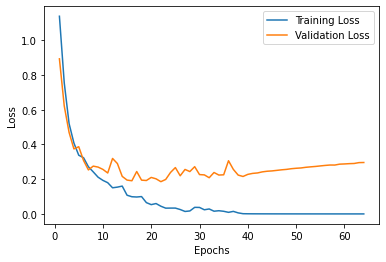

In [209]:
# Plot the training and validation losses
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, 64 + 1)

plt.plot(epochs_range, train_loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

**c)** What is the number of **total** hidden layers in your architecture if you "unravel" your network through time. Note that the answer completely depends on your architecture. **(3 points)** 

The number of Hidden layers is 1, the hidden layer being Bi-Directional(LSTM) layer